In [11]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F


from torch.utils.data import DataLoader


In [12]:
# turn the image into a tensor
transform = transforms.ToTensor()

# download the dataset
train_data = datasets.MNIST(
    root='data',       # where to save the data
    train=True,        # training set
    download=True,     # download if not already present
    transform=transform  # apply transformation
)

test_data = datasets.MNIST(
    root='data',
    train=False,       # test set
    download=True,
    transform=transform
)
 # if the output when i run this block is 100% it means thedataset was donwloaded and stored correctly


5


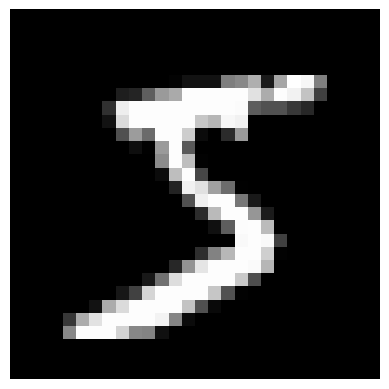

In [13]:
# get one sample and print it's label then show the image using matplotlib
image_tensor,label = train_data[0] # get the first sample
print(label) # print the label

image_tensor = train_data[0][0]
image_to_plot=image_tensor.squeeze()
plt.imshow(image_to_plot, cmap='gray')
plt.axis('off')
plt.show()

In [14]:
class DigitClassifier(nn.Module):  # 1. Inherit from nn.Module
    def __init__(self):
         super().__init__()  # 2. Init the base class
         self.hidden = nn.Linear(784, 128)
         self.output = nn.Linear(128, 10) #Takes the 128 features and maps them to 10 outputs — one for each digit class (0 to 9). This is your output layer.
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten image
        x = self.hidden(x)
        x = F.relu(x)
        x = self.output(x)
        return x  

In [22]:
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)

for images, labels in train_dataloader:
    #print("Image batch shape:", images.shape)
    #print("Label batch shape:", labels.shape)  # optional
    instance=DigitClassifier()

    model=instance(images)
    #print(model.shape)  # should be [64, 10]

    criterion = nn.CrossEntropyLoss()
    loss = criterion(model,labels)
    print(loss)
   

    

tensor(2.3062, grad_fn=<NllLossBackward0>)
tensor(2.3278, grad_fn=<NllLossBackward0>)
tensor(2.3081, grad_fn=<NllLossBackward0>)
tensor(2.3138, grad_fn=<NllLossBackward0>)
tensor(2.3016, grad_fn=<NllLossBackward0>)
tensor(2.3240, grad_fn=<NllLossBackward0>)
tensor(2.3125, grad_fn=<NllLossBackward0>)
tensor(2.3113, grad_fn=<NllLossBackward0>)
tensor(2.3179, grad_fn=<NllLossBackward0>)
tensor(2.3142, grad_fn=<NllLossBackward0>)
tensor(2.2818, grad_fn=<NllLossBackward0>)
tensor(2.3035, grad_fn=<NllLossBackward0>)
tensor(2.3141, grad_fn=<NllLossBackward0>)
tensor(2.3148, grad_fn=<NllLossBackward0>)
tensor(2.3001, grad_fn=<NllLossBackward0>)
tensor(2.3231, grad_fn=<NllLossBackward0>)
tensor(2.3065, grad_fn=<NllLossBackward0>)
tensor(2.2887, grad_fn=<NllLossBackward0>)
tensor(2.3285, grad_fn=<NllLossBackward0>)
tensor(2.2870, grad_fn=<NllLossBackward0>)
tensor(2.3015, grad_fn=<NllLossBackward0>)
tensor(2.2949, grad_fn=<NllLossBackward0>)
tensor(2.2982, grad_fn=<NllLossBackward0>)
tensor(2.30